<h1 align="center"> 
  CMSC320 Final Project
</h1>
<h1 align="center"> 
  Univeristy of Maryland Computer Science Course Grade Predictor 
</h1>

<h2 align="center"> Team: Siddhesh Gupta, Tanmay Prakash, Shanil Kothari </h2>

## Introduction
Computer Science is a popular major at University of Maryland - College Park and as students of Computer Science our goal was to help other students by providing a tool to predict their performance in some of the courses. Students always wonder what grade they could get in their upper level courses and choose accordingly. Students also want to know how much work is required for a class or how difficult will a class be for them. 
    
This is why we wanted to build a model which predict which upper level computer science courses can a student take and do reasonably well on them based on their performances in previous courses (Pre-Requisites or Gateway Courses). We want to answer the question that are grades and performance in a course correlated to the performance in the pre-requisite courses for that course? 
    
If our model is reasonabaly successful, we can provide insights to students which can prove very helpful when taking some important decisions. For example, a student can know that historically other students who have a similar performance to them have ended with a X grade in the class. So student can understand and know that they might have to put in more work than usual to earn a better grade than this. And sometimes its just peace of mind and anxiety buster to know where you stand and where you can end-up at the end of the semester. The model can help predict the courses where a student can perform the best so they can make an informed decision which can impact their progress as a student at the university. 

<h2> Data Collection </h2>

Since a student's academic records are private and is enforced by laws like FERPA (Family Educational Rights and Privacy Act). FERPA is a federal law that protects a student's education records. It may only disclose a student's educational record if he or she has given written consent to do so. We requested for anonymized data from the University of Maryland, but due to these laws we could not gain access to the data. Therefore we had to do it the harder way - survey people for their data. For this we made a Google form to collect grades for each Computer Science course students took. The form was anonymous so that no personal information is collected and can be linked to a specific student.  
 
Important things about the data -
1. We generally saw a trend that students who performed well in classes shared their data. For most of the classes the average grade from the survey was heigher than the overall general average grade.
2. Student's are allowed to skip certain classes through the help of AP's, high school credits, and Computer Science Exemption exams. We encountered such data and we had no way to determine which grade to assign the student. We made a general assumption to take these as B grades, which according to university policy means Good Mastery of the subject. This was done for the following courses - CMSC 131, CMSC 132, CMSC 216, CMSC 250, MATH 140, and MATH 141. 
3. There were cases where students didn't want to share the results/grades on a particular course. To deal with this, we averaged the grades in other courses that the student took and entered that value instead of "Don't want to share".
4. There were some students who didn't attempt certain courses. We ignored such student enteries entirely for certain models depending on the subject.
</p>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (14,5)
import warnings
warnings.filterwarnings("ignore")

### Initial Data Cleaning
We perform basic cleaning on the survey data so that we can visualize and perform exploratory data analysis.

In [2]:
df = pd.read_csv("data.csv")

In [3]:
for i, row in df.iterrows():
    txt = "User{0}"
    df['Timestamp'][i] = txt.format(i) 

df.columns=["Users", "CMSC131", "CMSC132", "CMSC216", "CMSC250", "CMSC330", "CMSC351", "MATH140", "MATH141", "MATH240", "MATH241", 
              "STAT400", "CS_Track", "CMSC4XX", "CMSC411", "CMSC412", "CMSC414", "CMSC416", "CMSC417", "CMSC420", "CMSC421",
              "CMSC422", "CMSC423", "CMSC424", "CMSC426", "CMSC427", "CMSC470", "CMSC430", "CMSC433", "CMSC434", "CMSC435", "CMSC436", 
              "CMSC451", "CMSC452", "CMSC454", "CMSC456", "CMSC457", "CMSC460", "CMSC466", "CMSC320", "CMSC425", "CMSC472", 
              "CMSC473", "CMSC474", "CMSC475", "Graduated"]

In [4]:
df = df.replace("Don't want to share", "Not Attempted")

In [5]:
df[df.columns[1:11]] = df[df.columns[1:11]].replace("Not Attempted", np.nan)
df[df.columns[14:45]] = df[df.columns[14:45]].replace("Not Attempted", np.nan)

In [6]:
df.head()

,Users,CMSC131,CMSC132,CMSC216,CMSC250,CMSC330,CMSC351,MATH140,MATH141,MATH240,...,CMSC457,CMSC460,CMSC466,CMSC320,CMSC425,CMSC472,CMSC473,CMSC474,CMSC475,Graduated
0,User0,A,A,A,A,A,B-,A,A,A,...,NaN,NaN,NaN,A,NaN,NaN,NaN,NaN,NaN,Not Completed
1,User1,A,A-,A-,A,A,A+,A,A,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,User2,B,B-,B,C+,A,A,A,A,A,...,NaN,NaN,NaN,B-,NaN,NaN,NaN,NaN,NaN,Not Completed
3,User3,A,B+,B-,B,B+,C-,NaN,NaN,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not Completed
4,User4,A,A,A-,A,A-,A+,A,A+,A-,...,NaN,NaN,NaN,A,NaN,NaN,NaN,NaN,NaN,Not Completed


## Exploratory Data Analysis

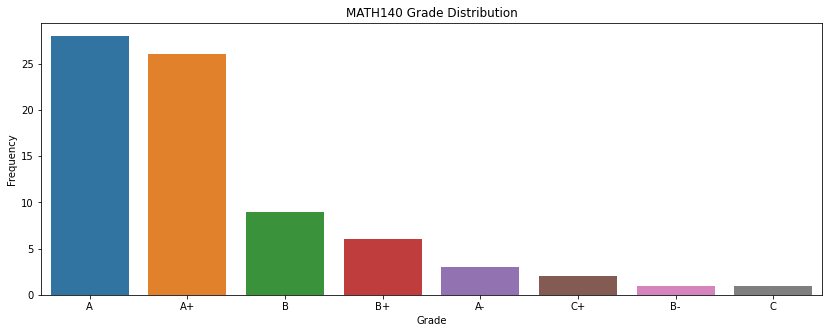

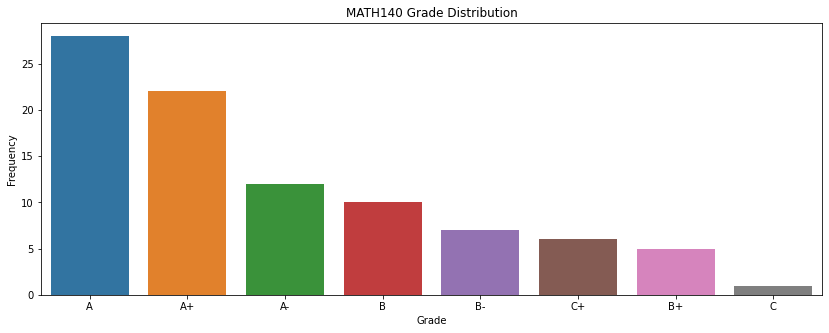

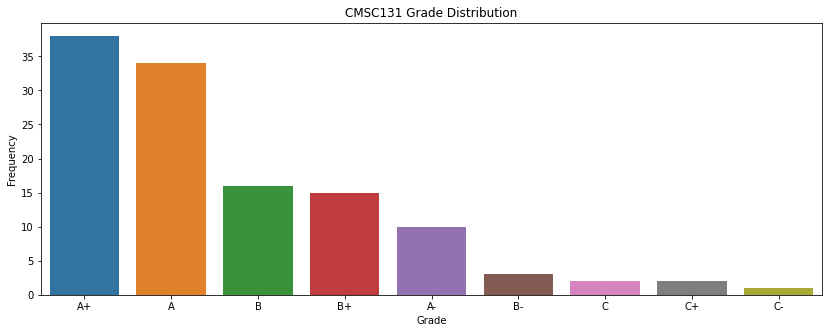

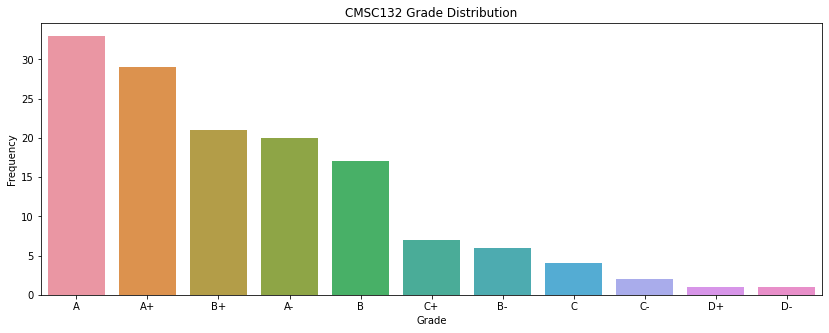

In [7]:
MATH140 = df['MATH140'].value_counts()
sns.barplot(MATH140.index, MATH140.values)
plt.title("MATH140 Grade Distribution")
plt.xlabel("Grade")
plt.ylabel("Frequency")
plt.show()
MATH141 = df['MATH141'].value_counts()
sns.barplot(MATH141.index, MATH141.values)
plt.title("MATH140 Grade Distribution")
plt.xlabel("Grade")
plt.ylabel("Frequency")
plt.show()
CMSC131 = df['CMSC131'].value_counts()
sns.barplot(CMSC131.index, CMSC131.values)
plt.title("CMSC131 Grade Distribution")
plt.xlabel("Grade")
plt.ylabel("Frequency")
plt.show()
CMSC132 = df['CMSC132'].value_counts()
sns.barplot(CMSC132.index, CMSC132.values)
plt.title("CMSC132 Grade Distribution")
plt.xlabel("Grade")
plt.ylabel("Frequency")
plt.show()

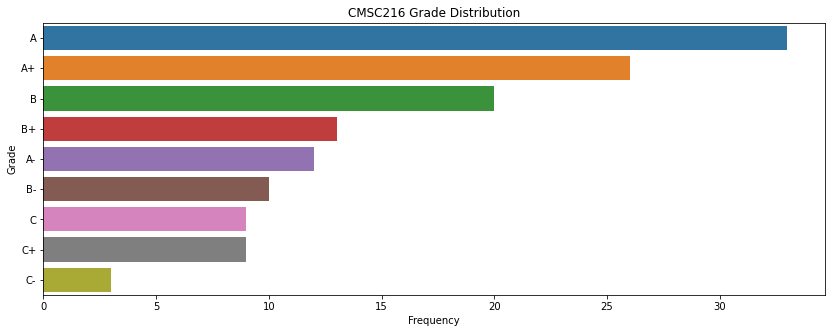

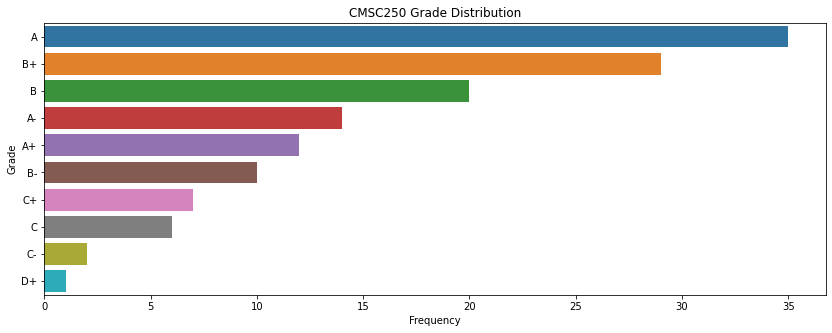

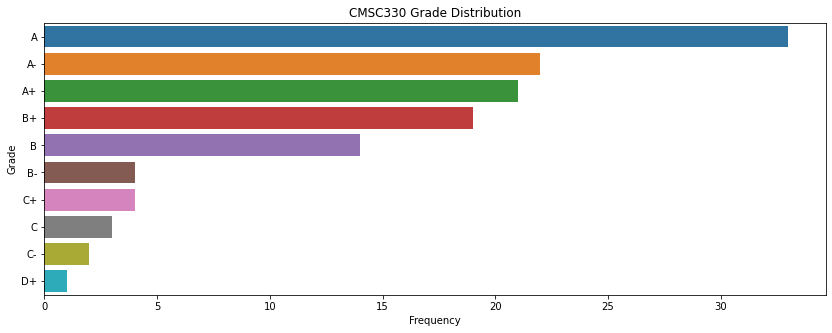

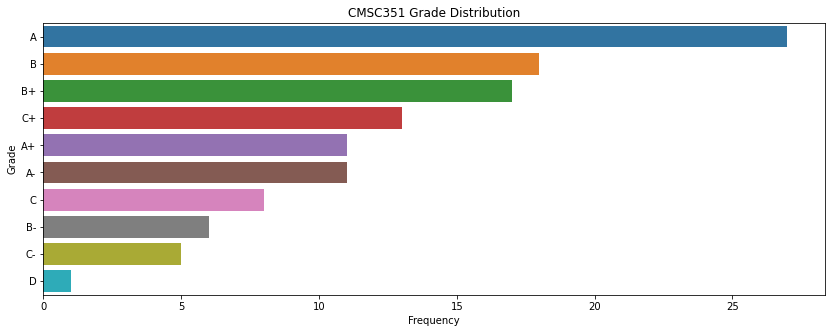

In [8]:
# CMSC216
CMSC216 = df['CMSC216'].value_counts()
sns.barplot(CMSC216.values, CMSC216.index)
plt.title("CMSC216 Grade Distribution")
plt.xlabel("Frequency")
plt.ylabel("Grade")
plt.show()
# CMSC250
CMSC250 = df['CMSC250'].value_counts()
sns.barplot(CMSC250.values, CMSC250.index)
plt.title("CMSC250 Grade Distribution")
plt.xlabel("Frequency")
plt.ylabel("Grade")
plt.show()
# CMSC330
CMSC330 = df['CMSC330'].value_counts()
sns.barplot(CMSC330.values, CMSC330.index)
plt.title("CMSC330 Grade Distribution")
plt.xlabel("Frequency")
plt.ylabel("Grade")
plt.show()
# CMSC351
CMSC351 = df['CMSC351'].value_counts()
sns.barplot(CMSC351.values, CMSC351.index)
plt.title("CMSC351 Grade Distribution")
plt.xlabel("Frequency")
plt.ylabel("Grade")
plt.show()

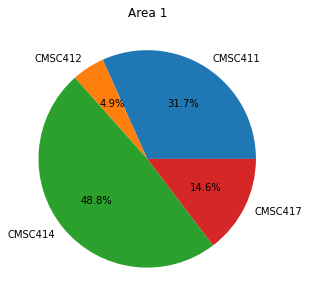

In [9]:
# AREA 1
CMSC411_num = df['CMSC411'].notna().sum()
CMSC412_num = df['CMSC412'].notna().sum()
CMSC414_num = df['CMSC414'].notna().sum()
CMSC417_num = df['CMSC417'].notna().sum()

data = [CMSC411_num, CMSC412_num, CMSC414_num, CMSC417_num]
labels = 'CMSC411', 'CMSC412', 'CMSC414', 'CMSC417'
plt.pie(data,labels=labels,autopct='%1.1f%%')
plt.title("Area 1")
plt.show()

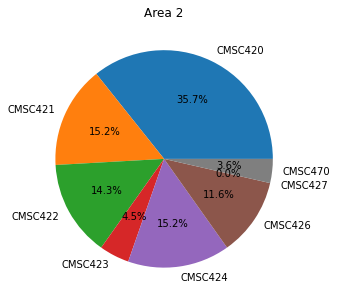

In [10]:
# AREA 2
CMSC420_num = df['CMSC420'].notna().sum()
CMSC421_num = df['CMSC421'].notna().sum()
CMSC422_num = df['CMSC422'].notna().sum()
CMSC423_num = df['CMSC423'].notna().sum()
CMSC424_num = df['CMSC424'].notna().sum()
CMSC426_num = df['CMSC426'].notna().sum()
CMSC427_num = df['CMSC427'].notna().sum()
CMSC470_num = df['CMSC470'].notna().sum()
data = [CMSC420_num, CMSC421_num, CMSC422_num, CMSC423_num, CMSC424_num, CMSC426_num, CMSC427_num, CMSC470_num]
labels = 'CMSC420', 'CMSC421', 'CMSC422', 'CMSC423', 'CMSC424', 'CMSC426', 'CMSC427', 'CMSC470'
plt.pie(data,labels=labels,autopct='%1.1f%%')
plt.title("Area 2")
plt.show()

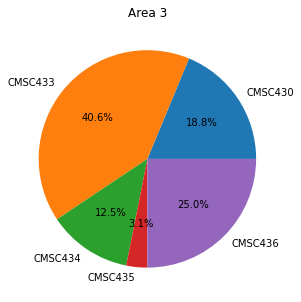

In [11]:
# AREA 3
CMSC430_num = df['CMSC430'].notna().sum()
CMSC433_num = df['CMSC433'].notna().sum()
CMSC434_num = df['CMSC434'].notna().sum()
CMSC435_num = df['CMSC435'].notna().sum()
CMSC436_num = df['CMSC436'].notna().sum()
data = [CMSC430_num, CMSC433_num, CMSC434_num, CMSC435_num, CMSC436_num]
labels = 'CMSC430', 'CMSC433', 'CMSC434', 'CMSC435', 'CMSC436'
plt.pie(data,labels=labels,autopct='%1.1f%%')
plt.title("Area 3")
plt.show()

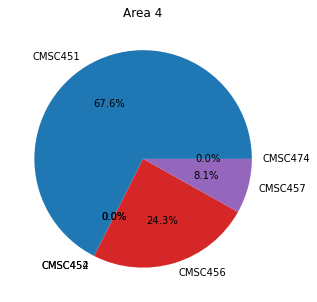

In [12]:
# AREA 4
CMSC451_num = df['CMSC451'].notna().sum()
CMSC452_num = df['CMSC452'].notna().sum()
CMSC454_num = df['CMSC454'].notna().sum()
CMSC456_num = df['CMSC456'].notna().sum()
CMSC457_num = df['CMSC457'].notna().sum()
CMSC474_num = df['CMSC474'].notna().sum()
data = [CMSC451_num, CMSC452_num, CMSC454_num, CMSC456_num, CMSC457_num, CMSC474_num]
labels = 'CMSC451', 'CMSC452', 'CMSC454', 'CMSC456', 'CMSC457', 'CMSC474'
plt.pie(data,labels=labels,autopct='%1.1f%%')
plt.title("Area 4")
plt.show()

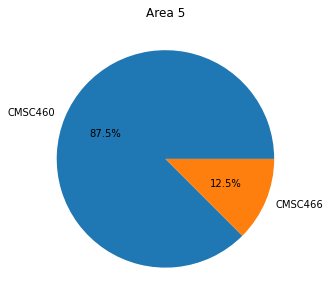

In [13]:
# AREA 5
CMSC460_num = df['CMSC460'].notna().sum()
CMSC466_num = df['CMSC466'].notna().sum()
data = [CMSC460_num, CMSC466_num]
labels = 'CMSC460', 'CMSC466'
plt.pie(data,labels=labels,autopct='%1.1f%%')
plt.title("Area 5")
plt.show()

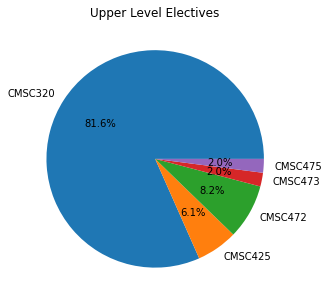

In [14]:
# UPPER LEVEL ELECTIVES
CMSC320_num = df['CMSC320'].notna().sum()
CMSC425_num = df['CMSC425'].notna().sum()
CMSC472_num = df['CMSC472'].notna().sum()
CMSC473_num = df['CMSC473'].notna().sum()
CMSC475_num = df['CMSC475'].notna().sum()
data = [CMSC420_num, CMSC425_num, CMSC472_num, CMSC473_num, CMSC475_num]
labels = 'CMSC320', 'CMSC425', 'CMSC472','CMSC473', 'CMSC475'
plt.pie(data,labels=labels,autopct='%1.1f%%')
plt.title("Upper Level Electives")
plt.show()

## Data Pre-Processing
To prepare the data for training the model we need perform some data cleaning. We start by creating a function to replace the not attempted values for the pre-requisite courses and gateway requirements as these can be skipped in a number of ways by AP's, high school credits or by recieving credit by exam. So we create two dataframes for the computer science courses where we set the not attempted values to A and B. We do the same for compulsory mathematics courses. 

Then we define the upper level computer science courses in a different dataframe so we can merge it easily. Then there are 3 functions for merging the dataframes, dropping the plus and minus signs from grades and enconding the grades as numbers. We decided to drop the plus and minus signs from grades as it would make complicated for the model to train on so many different possible values and as we did not have many rows of data for each grade. We then encode the A as 4, B as 3, C as 2, D as 1, and F / Not Attempted / Don't want to share as 0.

We then use a different approach for the MATH24x courses as by degree requirements, only one MATH24x course is required and many computer science chose to take either. So we decided to merge the grades into one column and take the higher grade if available. If the person has not attempted either, then we take the average of their MATH140 and MATH141 grades and drop it by one grade as MATH24x are more difficult compared to MATH14x courses. 

Finally, a clean version of the dataframe is ready to be used in the Machine Learning model.

In [15]:
def replace_not_attempted(df, grade):
    return df.replace('Not Attempted', grade)

In [16]:
df2 = df[["Users", "CMSC131", "CMSC132", "CMSC216", "CMSC250"]]
df_cs_A = replace_not_attempted(df2, 'A')
df_cs_B = replace_not_attempted(df2, 'B')

In [17]:
df3 = df[["Users", "MATH140", "MATH141", "STAT400"]]
df_math_A = replace_not_attempted(df3, 'A')
df_math_B = replace_not_attempted(df3, 'B')

In [18]:
df_upper = df[["Users", "CMSC330", "CMSC351", "CMSC411", "CMSC412", "CMSC414", "CMSC416", "CMSC417", "CMSC420", "CMSC421",
              "CMSC422", "CMSC423", "CMSC424", "CMSC426", "CMSC427", "CMSC470", "CMSC430", "CMSC433", "CMSC434", "CMSC435", "CMSC436", 
              "CMSC451", "CMSC452", "CMSC454", "CMSC456", "CMSC457", "CMSC460", "CMSC466", "CMSC320", "CMSC425", "CMSC472", 
              "CMSC473", "CMSC474", "CMSC475"]]

In [19]:
def merger(df, df_cs, df_math, df_upper):
    df = df[["Users", "CS_Track", "CMSC4XX", "Graduated"]]
    df_temp = df.merge(df_math, on = "Users")
    df_temp = df_temp.merge(df_cs, on = "Users")
    return df_temp.merge(df_upper, on = "Users")

def plus_minus_clean(df):
    df_temp = df.replace(["A-", "A+"], "A")
    df_temp = df_temp.replace(["B-", "B+"], "B")
    df_temp = df_temp.replace(["C-", "C+"], "C")
    df_temp = df_temp.replace(["D-", "D+"], "D")
    return df_temp

def encoding_help(df):
    df_temp = df.replace("A", 4)
    df_temp = df_temp.replace("B", 3)
    df_temp = df_temp.replace("C", 2)
    df_temp = df_temp.replace("D", 1)
    df_temp = df_temp.replace([np.nan, "F"], 0)
    return df_temp

In [20]:
df4 = merger(df, df_cs_A, df_math_A, df_upper)
df5 = plus_minus_clean(df4)
df6 = encoding_help(df5)

In [21]:
df_m24x = df[["MATH240", "MATH241"]]
df_m24x["MATH24x"] = np.nan
df_m24x = encoding_help(plus_minus_clean(df_m24x))

In [22]:
for i in range(df_m24x.shape[0]):
    if(df_m24x.iat[i, 0] > df_m24x.iat[i, 1]):
        df_m24x.iat[i, 2] = df_m24x.iat[i, 0]
    elif(df_m24x.iat[i, 0] < df_m24x.iat[i, 1]):
        df_m24x.iat[i, 2] = df_m24x.iat[i, 1]
    elif(df_m24x.iat[i, 0] == 0):
        df_m24x.iat[i, 2] = df6.iloc[i, 4:6].mean() - 1
    elif(df_m24x.iat[i, 0] == df_m24x.iat[i, 1]):
        df_m24x.iat[i, 2] = df_m24x.iat[i, 0]

df_m24x["MATH24x"] = df_m24x["MATH24x"].astype(int)

In [23]:
df6.insert(6, "MATH24x", df_m24x["MATH24x"])

In [24]:
df6.head()

,Users,CS_Track,CMSC4XX,Graduated,MATH140,MATH141,MATH24x,STAT400,CMSC131,CMSC132,...,CMSC456,CMSC457,CMSC460,CMSC466,CMSC320,CMSC425,CMSC472,CMSC473,CMSC474,CMSC475
0,User0,General,Yes,Not Completed,4.0,4.0,4,4,4.0,4.0,...,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0
1,User1,General,No,0,4.0,4.0,3,4,4.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,User2,General,Yes,Not Completed,4.0,4.0,4,3,3.0,3.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
3,User3,Data Science,Yes,Not Completed,0.0,0.0,3,3,4.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,User4,General,Yes,Not Completed,4.0,4.0,4,4,4.0,4.0,...,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0


In [25]:
df_ul = df6[["Users", "CMSC4XX", "CMSC330", "CMSC351", "CMSC411", "CMSC412", "CMSC414", "CMSC416", "CMSC417", "CMSC420", "CMSC421",
              "CMSC422", "CMSC423", "CMSC424", "CMSC426", "CMSC427", "CMSC470", "CMSC430", "CMSC433", "CMSC434", "CMSC435", "CMSC436", 
              "CMSC451", "CMSC452", "CMSC454", "CMSC456", "CMSC457", "CMSC460", "CMSC466", "CMSC320", "CMSC425", "CMSC472", "CMSC473", "CMSC474", "CMSC475"]]

df_ul.head()

,Users,CMSC4XX,CMSC330,CMSC351,CMSC411,CMSC412,CMSC414,CMSC416,CMSC417,CMSC420,...,CMSC456,CMSC457,CMSC460,CMSC466,CMSC320,CMSC425,CMSC472,CMSC473,CMSC474,CMSC475
0,User0,Yes,4.0,3.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0
1,User1,No,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,User2,Yes,4.0,4.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
3,User3,Yes,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,User4,Yes,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0


## Machine Learning

In [26]:
df_x = df6[df6['CMSC4XX'] == "Yes"]
df_x.drop(["CMSC351", "CMSC330", "CMSC411", "CMSC412", "CMSC414", "CMSC416", "CMSC417", "CMSC420", "CMSC421",
           "CMSC422", "CMSC423", "CMSC424", "CMSC426", "CMSC427", "CMSC470", "CMSC430", "CMSC433", "CMSC434", "CMSC435", "CMSC436", 
           "CMSC451", "CMSC452", "CMSC454", "CMSC456", "CMSC457", "CMSC460", "CMSC466", "CMSC320", "CMSC425", "CMSC472", 
           "CMSC473", "CMSC474", "CMSC475"], inplace=True, axis=1)
df_x

,Users,CS_Track,CMSC4XX,Graduated,MATH140,MATH141,MATH24x,STAT400,CMSC131,CMSC132,CMSC216,CMSC250
0,User0,General,Yes,Not Completed,4.0,4.0,4,4,4.0,4.0,4.0,4.0
2,User2,General,Yes,Not Completed,4.0,4.0,4,3,3.0,3.0,3.0,2.0
3,User3,Data Science,Yes,Not Completed,0.0,0.0,3,3,4.0,3.0,3.0,3.0
4,User4,General,Yes,Not Completed,4.0,4.0,4,4,4.0,4.0,4.0,4.0
5,User5,General,Yes,Graduated,4.0,4.0,4,4,4.0,4.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
155,User155,Machine Learning,Yes,Not Completed,4.0,4.0,4,4,4.0,4.0,4.0,3.0
159,User159,General,Yes,Not Completed,0.0,0.0,3,4,0.0,3.0,2.0,2.0
161,User161,General,Yes,Not Completed,0.0,0.0,-1,4,0.0,0.0,0.0,0.0
162,User162,Machine Learning,Yes,Not Completed,4.0,4.0,4,4,3.0,3.0,3.0,4.0


In [27]:
# One Hot Encoding of the variables

def one_hot_encoding(column_names, df):
  for column in column_names:
    df[column] = df[column].astype(int)
    tempdf = pd.get_dummies(df[column], prefix=column)
    tempdf.drop(tempdf.columns[0], inplace=True, axis=1)
    df = pd.merge(
        left=df,
        right=tempdf,
        left_index=True,
        right_index=True,
    )
    df = df.drop(columns=column)

  return df

df_x = one_hot_encoding(['MATH140', 'MATH141', 'MATH24x', 'STAT400', 'CMSC131', 'CMSC132', 
                  'CMSC216', 'CMSC250'], df_x)

df_x.drop(['Users', 'CS_Track', 'CMSC4XX', 'Graduated'], inplace=True, axis=1)
df_x

,MATH140_2,MATH140_3,MATH140_4,MATH141_2,MATH141_3,MATH141_4,MATH24x_0,MATH24x_2,MATH24x_3,MATH24x_4,...,CMSC132_2,CMSC132_3,CMSC132_4,CMSC216_2,CMSC216_3,CMSC216_4,CMSC250_1,CMSC250_2,CMSC250_3,CMSC250_4
0,0,0,1,0,0,1,0,0,0,1,...,0,0,1,0,0,1,0,0,0,1
2,0,0,1,0,0,1,0,0,0,1,...,0,1,0,0,1,0,0,1,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,1,0
4,0,0,1,0,0,1,0,0,0,1,...,0,0,1,0,0,1,0,0,0,1
5,0,0,1,0,0,1,0,0,0,1,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,0,0,1,0,0,1,0,0,0,1,...,0,0,1,0,0,1,0,0,1,0
159,0,0,0,0,0,0,0,0,1,0,...,0,1,0,1,0,0,0,1,0,0
161,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
162,0,0,1,0,0,1,0,0,0,1,...,0,1,0,0,1,0,0,0,0,1


In [28]:
df_y = df_ul[df_ul['CMSC4XX'] == "Yes"]
y_351 = df_y['CMSC351'].astype(int)
y_330 = df_y['CMSC330'].astype(int)
y_351

0      3
2      4
3      2
4      4
5      4
      ..
155    3
159    3
161    3
162    4
163    4
Name: CMSC351, Length: 95, dtype: int32

In [29]:
from sklearn import linear_model as lm 
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn import svm
from sklearn import tree
from sklearn import ensemble
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

def printer(y_test, y_pred, model_name):
    # Model Evaluation metrics 
    print("This is the metrics for ", model_name)
    print(metrics.classification_report(y_test, y_pred))
    print('Accuracy Score : ' + str(accuracy_score(y_test, y_pred)))
    print('Precision Score : ' + str(precision_score(y_test, y_pred, average=None)))
    print('Recall Score : ' + str(recall_score(y_test,y_pred, average=None)))
    print()

random_state = 42

This is the metrics for  Logistic Regression
              precision    recall  f1-score   support

           2       0.00      0.00      0.00         0
           3       0.67      0.29      0.40         7
           4       0.85      0.92      0.88        12

    accuracy                           0.68        19
   macro avg       0.50      0.40      0.43        19
weighted avg       0.78      0.68      0.70        19

Accuracy Score : 0.6842105263157895
Precision Score : [0.         0.66666667 0.84615385]
Recall Score : [0.         0.28571429 0.91666667]

This is the metrics for  Decision Tree Regression
              precision    recall  f1-score   support

           2       0.00      0.00      0.00         0
           3       0.80      0.57      0.67         7
           4       0.85      0.92      0.88        12

    accuracy                           0.79        19
   macro avg       0.55      0.50      0.52        19
weighted avg       0.83      0.79      0.80        19

Acc

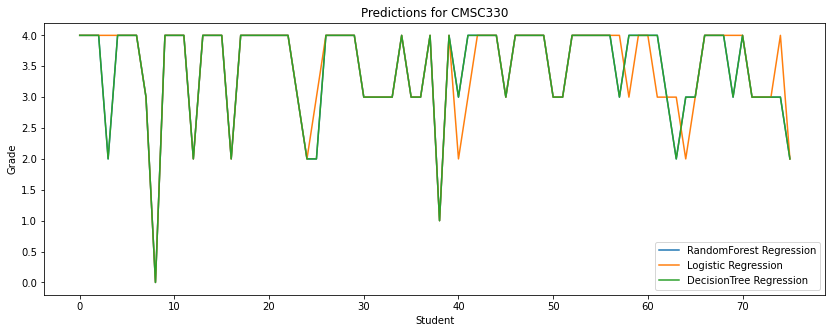

In [30]:
x_train, x_test, y_train, y_test = train_test_split(df_x, y_330, test_size=0.2, random_state=random_state)

model_1 = OneVsRestClassifier(make_pipeline(StandardScaler(), lm.LogisticRegression(multi_class='ovr')))
model_2 = OneVsRestClassifier(make_pipeline(StandardScaler(), tree.DecisionTreeRegressor()))
model_3 = OneVsRestClassifier(make_pipeline(StandardScaler(), ensemble.RandomForestRegressor()))

model_1.fit(x_train, y_train)
model_2.fit(x_train, y_train)
model_3.fit(x_train, y_train)

printer(y_test, model_1.predict(x_test), "Logistic Regression")
printer(y_test, model_2.predict(x_test), "Decision Tree Regression")
printer(y_test, model_3.predict(x_test), "Random Forest Regression")

plt.plot(model_3.predict(x_train), label = "RandomForest Regression")
plt.plot(model_1.predict(x_train), label = "Logistic Regression")
plt.plot(model_2.predict(x_train), label = "DecisionTree Regression")

plt.xlabel('Student')
plt.ylabel('Grade')
plt.title('Predictions for CMSC330')
plt.legend()

This is the metrics for  Logistic Regression
              precision    recall  f1-score   support

           2       0.33      1.00      0.50         2
           3       1.00      0.20      0.33        10
           4       0.45      0.71      0.56         7

    accuracy                           0.47        19
   macro avg       0.60      0.64      0.46        19
weighted avg       0.73      0.47      0.43        19

Accuracy Score : 0.47368421052631576
Precision Score : [0.33333333 1.         0.45454545]
Recall Score : [1.         0.2        0.71428571]

This is the metrics for  Decision Tree Regression
              precision    recall  f1-score   support

           2       0.50      0.50      0.50         2
           3       0.60      0.30      0.40        10
           4       0.42      0.71      0.53         7

    accuracy                           0.47        19
   macro avg       0.51      0.50      0.48        19
weighted avg       0.52      0.47      0.46        19

Ac

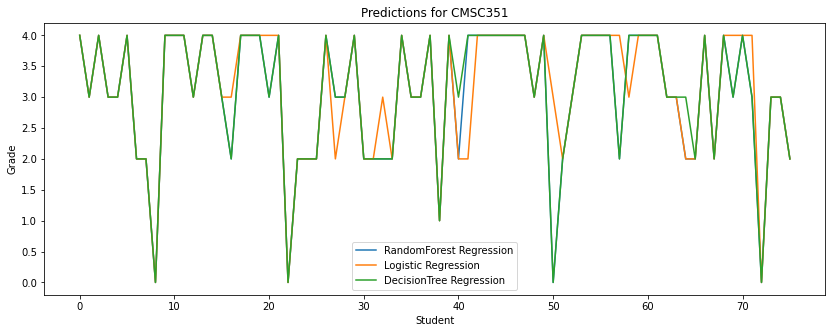

In [31]:
random_state = np.random.RandomState(0)

x_train, x_test, y_train, y_test = train_test_split(df_x, y_351, test_size=0.2, random_state=42)

model_1 = OneVsRestClassifier(make_pipeline(StandardScaler(), lm.LogisticRegression(multi_class='ovr')))
model_2 = OneVsRestClassifier(make_pipeline(StandardScaler(), tree.DecisionTreeRegressor()))
model_3 = OneVsRestClassifier(make_pipeline(StandardScaler(), ensemble.RandomForestRegressor()))

model_1.fit(x_train, y_train)
model_2.fit(x_train, y_train)
model_3.fit(x_train, y_train)

printer(y_test, model_1.predict(x_test), "Logistic Regression")
printer(y_test, model_2.predict(x_test), "Decision Tree Regression")
printer(y_test, model_3.predict(x_test), "Random Forest Regression")

plt.plot(model_3.predict(x_train), label = "RandomForest Regression")
plt.plot(model_1.predict(x_train), label = "Logistic Regression")
plt.plot(model_2.predict(x_train), label = "DecisionTree Regression")

plt.xlabel('Student')
plt.ylabel('Grade')
plt.title('Predictions for CMSC351')
plt.legend()